In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path=r'/Users/coley/Desktop/Data Analyst School/Achievement 4/Instacart Basket Analysis'

In [3]:
df_ords_prods_merge=pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','orders_products_merged_from_task_4_8.pkl'))

# Bar Charts

<AxesSubplot:>

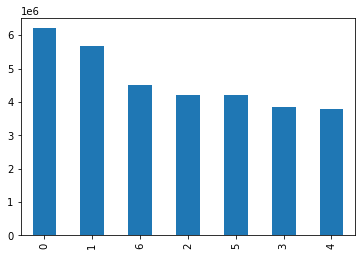

In [4]:
df_ords_prods_merge['order_dow'].value_counts().plot.bar()

<AxesSubplot:>

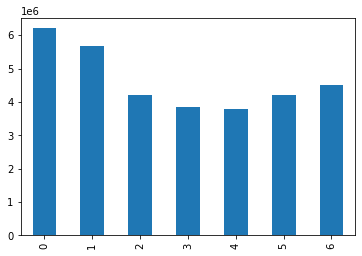

In [5]:
# this sorts it by original order - above sorts largest to smallest
df_ords_prods_merge['order_dow'].value_counts().sort_index().plot.bar()

<AxesSubplot:>

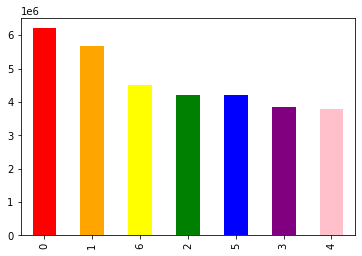

In [6]:
#add color
df_ords_prods_merge['order_dow'].value_counts().plot.bar(color=['red','orange','yellow','green','blue','purple','pink'])

# Saving Chart Outside of Jupyter

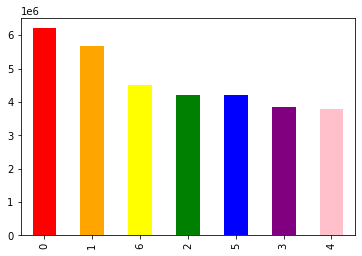

In [7]:
bar=df_ords_prods_merge['order_dow'].value_counts().plot.bar(color=['red','orange','yellow','green','blue','purple','pink'])

In [8]:
bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_orders_dow.png'))

# Histograms and Scatterplots

<AxesSubplot:ylabel='Frequency'>

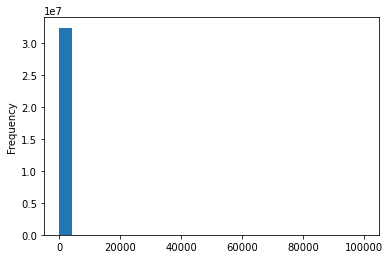

In [9]:
df_ords_prods_merge['prices'].plot.hist(bins = 25)

In [10]:
df_ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

<AxesSubplot:xlabel='prices', ylabel='prices'>

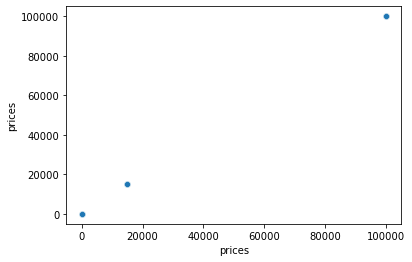

In [11]:
sns.scatterplot(x = 'prices', y = 'income',data = df_ords_prods_merge)

In [13]:
# checking for outliers
df_ords_prods_merge.loc[df_ords_prods_merge['prices'] > 100]

,Unnamed: 0,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,...,price_range_loc,busiest day,busiest days,busiest_period_of_day,max_order,loyalty_flag,spending,spending_flag,frequency,order_frequency_flag
13100147,21554,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,912404,17,prior,12,...,High-range product,Regularly busy,Regular days,Most Orders,40,Regular customer,108.648299,High Spender,5.0,Frequent customer
13100148,21554,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,603376,17,prior,22,...,High-range product,Regularly busy,Regular days,Most Orders,40,Regular customer,108.648299,High Spender,5.0,Frequent customer
13100149,21554,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,3264360,135,prior,2,...,High-range product,Regularly busy,Regular days,Average Orders,4,New customer,1154.792308,High Spender,12.0,Regular customer
13100150,21554,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,892534,135,prior,3,...,High-range product,Busiest day,Busiest days,Average Orders,4,New customer,1154.792308,High Spender,12.0,Regular customer
13100151,21554,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,229704,342,prior,8,...,High-range product,Regularly busy,Busiest days,Average Orders,16,Regular customer,114.426619,High Spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21786876,33666,33664,2 % Reduced Fat Milk,84,16,99999.0,2249946,204099,prior,29,...,High-range product,Busiest day,Busiest days,Average Orders,39,Regular customer,1106.743956,High Spender,4.0,Frequent customer
21786877,33666,33664,2 % Reduced Fat Milk,84,16,99999.0,2363282,204099,prior,31,...,High-range product,Busiest day,Busiest days,Most Orders,39,Regular customer,1106.743956,High Spender,4.0,Frequent customer
21786878,33666,33664,2 % Reduced Fat Milk,84,16,99999.0,3181945,204395,prior,13,...,High-range product,Regularly busy,Slowest days,Most Orders,15,Regular customer,451.153540,High Spender,5.0,Frequent customer
21786879,33666,33664,2 % Reduced Fat Milk,84,16,99999.0,2486215,205227,prior,7,...,High-range product,Regularly busy,Slowest days,Average Orders,12,Regular customer,1178.381871,High Spender,12.0,Regular customer


In [14]:
# remove outliers
df_ords_prods_merge.loc[df_ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [15]:
df_ords_prods_merge['prices'].max()

25.0

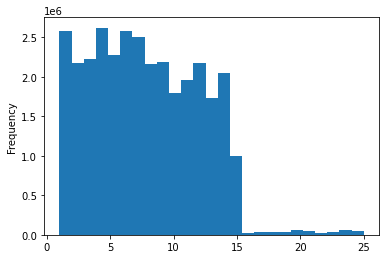

In [16]:
hist = df_ords_prods_merge['prices'].plot.hist(bins = 25)

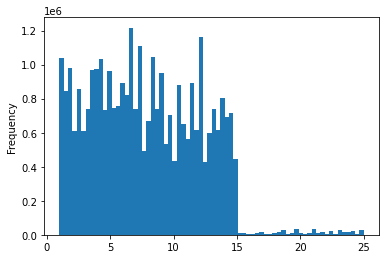

In [17]:
# increase granularity
hist = df_ords_prods_merge['prices'].plot.hist(bins = 70)

In [18]:
hist.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','hist_prices.png'))

# Sampling Data

In [30]:
np.random.seed(4)

In [31]:
# create list holding T/F values to the test np.random.rant()<=0.7
dev = np.random.rand(len(df_ords_prods_merge))<=0.7

In [32]:
# store 70% of the sample in dataframe big
big = df_ords_prods_merge[dev]

In [33]:
# store 30% of the sample in datafram small
small = df_ords_prods_merge[~dev]

In [34]:
len(df_ords_prods_merge)

32404859

In [35]:
len(big) + len(small)

32404859

In [36]:
# reduce size by only using columns needed
df_2 = small[['order_dow','prices']]

# Line Chart

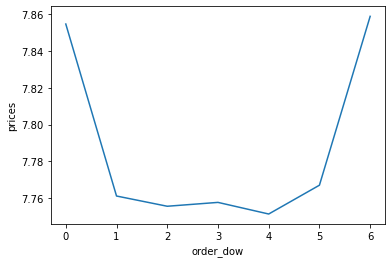

In [37]:
#using 30%
line = sns.lineplot(data = df_2, x = 'order_dow',y = 'prices')